Empirical analysis with Getula eastern pops split following K=4
* 9 populations total and downsampling to 8 haploid samples per population

In [123]:
!pwd

/media/4TB/isaac/PTA-EasternSnakes


In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime
import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import momi
import os
import pandas as pd
import PTA
import time

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

# For this to work dadi must be installed
easySFS = "/home/isaac/easySFS/easySFS.py"
!which $easySFS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40
/home/isaac/easySFS/easySFS.py


In [2]:
# Set up some directories
prefix = "/home/isaac/media4TB/PTA-EasternSnakes/"
analysis_dir = prefix + "analysis/"
pops_dir = prefix + "East_snakes_PTA_input/pops_files/"
vcf_dir = prefix + "East_snakes_PTA_input/vcf_files/"
sfs_dir = prefix + "East_snakes_PTA_input/sfs_files/"

# Populations files for each pop were made with the "make_pops_SFS_stairway script"
all_pops = glob.glob(pops_dir + "*")
all_pops = sorted([x.split("/")[-1].rsplit(".", 1)[0] for x in all_pops])

all_pops

['Acontortrix_p123_v2_25miss_popAcontortrix',
 'Dpunctatus_p123_v3_25missEAST_popDpunctatus',
 'Lgetula_p123_v2_25miss_popk2east',
 'Lgetula_p123_v2_25miss_popk4get',
 'Lgetula_p123_v2_25miss_popk4holbnig',
 'Mflagellum_p123_v3_25missEast_popeast',
 'Pguttatus_p123_v2_25miss_popemor',
 'Pguttatus_p123_v2_25miss_popgut',
 'Sdekayi_p123_v2_25miss_popSdekayi',
 'abacura_only_popeast',
 'abacura_only_popwest',
 'erytro_poperytro',
 'milks_denovo-92_popelap',
 'milks_denovo-92_poptri']

In [3]:
expanding_pops = ["abacura_only_popeast",
                    "Acontortrix_p123_v2_25miss_popAcontortrix",
                    "Dpunctatus_p123_v3_25missEAST_popDpunctatus",
#                    "Lgetula_p123_v2_25miss_popk2east",
                    "Lgetula_p123_v2_25miss_popk4get",
                    "Lgetula_p123_v2_25miss_popk4holbnig",
                    "Mflagellum_p123_v3_25missEast_popeast",
                    "milks_denovo-92_popelap",
                    "milks_denovo-92_poptri",
                    "Pguttatus_p123_v2_25miss_popgut"]
bottleneck_pops = ["abacura_only_popwest",
                    "erytro_poperytro",
                    "Pguttatus_p123_v2_25miss_popemor",
                    "Sdekayi_p123_v2_25miss_popSdekayi"]
print(expanding_pops)
print(bottleneck_pops)

['abacura_only_popeast', 'Acontortrix_p123_v2_25miss_popAcontortrix', 'Dpunctatus_p123_v3_25missEAST_popDpunctatus', 'Lgetula_p123_v2_25miss_popk4get', 'Lgetula_p123_v2_25miss_popk4holbnig', 'Mflagellum_p123_v3_25missEast_popeast', 'milks_denovo-92_popelap', 'milks_denovo-92_poptri', 'Pguttatus_p123_v2_25miss_popgut']
['abacura_only_popwest', 'erytro_poperytro', 'Pguttatus_p123_v2_25miss_popemor', 'Sdekayi_p123_v2_25miss_popSdekayi']


In [10]:
## prototype the easySFS preview call for one population
pop = "Mflagellum_p123_v3_25missEast_popeast" # define the population
in_vcf = vcf_dir + pop + ".vcf" # define the vcf file location
pop_file = pops_dir + pop + ".txt" # define the population file location
print(in_vcf)
print(pop_file)

!$easySFS -i "$in_vcf" -p "$pop_file" -a --preview # run easySFS preview

/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/vcf_files/Mflagellum_p123_v3_25missEast_popeast.vcf
/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/pops_files/Mflagellum_p123_v3_25missEast_popeast.txt
Processing 1 populations - odict_keys(['east'])

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
east
(2, 19660)	(3, 29401)	(4, 36806)	(5, 42673)	(6, 48225)	(7, 53082)	(8, 57796)	(9, 61895)	(10, 66107)	(11, 68877)	(12, 72728)	(13, 71088)	(14, 74566)	(15, 46449)	(16, 48421)	(17, 21200)	(18, 21997)	




In [12]:
# Get easySFS preview results for all populations
preview_dict = {}
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    preview_dict[pop] = !$easySFS -i "$in_vcf" -p "$pop_file" -a --preview

Acontortrix_p123_v2_25miss_popAcontortrix
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Lgetula_p123_v2_25miss_popk2east
Lgetula_p123_v2_25miss_popk4get
Lgetula_p123_v2_25miss_popk4holbnig
Mflagellum_p123_v3_25missEast_popeast
Pguttatus_p123_v2_25miss_popemor
Pguttatus_p123_v2_25miss_popgut
Sdekayi_p123_v2_25miss_popSdekayi
abacura_only_popeast
abacura_only_popwest
erytro_poperytro
milks_denovo-92_popelap
milks_denovo-92_poptri


In [13]:
for k, v in preview_dict.items():
    print(k, "\n", v[-3], "\n")

Acontortrix_p123_v2_25miss_popAcontortrix 
 (2, 6528)	(3, 9771)	(4, 12355)	(5, 14585)	(6, 16629)	(7, 18502)	(8, 20313)	(9, 21991)	(10, 23667)	(11, 25266)	(12, 26853)	(13, 28392)	(14, 29918)	(15, 31397)	(16, 32875)	(17, 34307)	(18, 35747)	(19, 37142)	(20, 38551)	(21, 39933)	(22, 41317)	(23, 42668)	(24, 44030)	(25, 45355)	(26, 46697)	(27, 47997)	(28, 49322)	(29, 50609)	(30, 51917)	(31, 53171)	(32, 54465)	(33, 55686)	(34, 56967)	(35, 58163)	(36, 59431)	(37, 60609)	(38, 61865)	(39, 62999)	(40, 64244)	(41, 65237)	(42, 66470)	(43, 67119)	(44, 68337)	(45, 68133)	(46, 69331)	(47, 66878)	(48, 68026)	(49, 51807)	(50, 52660)	(51, 38546)	(52, 39158)	(53, 27102)	(54, 27514)	(55, 17960)	(56, 18226)	(57, 10641)	(58, 10793)	(59, 5530)	(60, 5607)	(61, 2182)	(62, 2210)	(63, 563)	(64, 570)	 

Dpunctatus_p123_v3_25missEAST_popDpunctatus 
 (2, 11142)	(3, 16589)	(4, 20969)	(5, 24705)	(6, 28135)	(7, 31214)	(8, 34151)	(9, 36732)	(10, 39343)	(11, 41705)	(12, 44080)	(13, 46266)	(14, 48459)	(15, 50506)	(16, 5255

In [4]:
proj_dict = {}
## Expanding
proj_dict["abacura_only_popeast"] = 44
proj_dict["Acontortrix_p123_v2_25miss_popAcontortrix"] = 46
proj_dict["Dpunctatus_p123_v3_25missEAST_popDpunctatus"] = 52
proj_dict["Mflagellum_p123_v3_25missEast_popeast"] = 14
proj_dict["milks_denovo-92_popelap"] = 42
proj_dict["milks_denovo-92_poptri"] = 50
proj_dict["Pguttatus_p123_v2_25miss_popgut"] = 24

proj_dict["Lgetula_p123_v2_25miss_popk2east"] = 50
proj_dict["Lgetula_p123_v2_25miss_popk4get"] = 8
proj_dict["Lgetula_p123_v2_25miss_popk4holbnig"] = 44

## Contracting
proj_dict["abacura_only_popwest"] = 20
proj_dict["erytro_poperytro"] = 23
proj_dict["Pguttatus_p123_v2_25miss_popemor"] = 30
proj_dict["Sdekayi_p123_v2_25miss_popSdekayi"] = 40



In [15]:
proj = 8

# Get easySFS proj results for all populations
# <10 minutes
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    pop_sfs_dir = sfs_dir + pop
    if not os.path.exists(pop_sfs_dir):
        os.makedirs(pop_sfs_dir)
    !$easySFS -i $in_vcf -p $pop_file -a --proj $proj -o $pop_sfs_dir -f

Acontortrix_p123_v2_25miss_popAcontortrix
Processing 1 populations - odict_keys(['Acontortrix'])
Doing 1D sfs - Acontortrix
Doing multiSFS for all pops
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Processing 1 populations - odict_keys(['Dpunctatus'])
Doing 1D sfs - Dpunctatus
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk2east
Processing 1 populations - odict_keys(['k2east'])
Doing 1D sfs - k2east
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4get
Processing 1 populations - odict_keys(['k4get'])
Doing 1D sfs - k4get
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4holbnig
Processing 1 populations - odict_keys(['k4holbnig'])
Doing 1D sfs - k4holbnig
Doing multiSFS for all pops
Mflagellum_p123_v3_25missEast_popeast
Processing 1 populations - odict_keys(['east'])
Doing 1D sfs - east
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_popemor
Processing 1 populations - odict_keys(['emor'])
Doing 1D sfs - emor
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_pop

In [4]:
sfs_dict = {}
for pop in all_pops:
    pop_sfs_dir = sfs_dir + pop
    # Load from the dadi formatted sfs file generated by easySFS
    sfs_file = glob.glob(pop_sfs_dir + "/dadi/*.sfs")[-1]
    #sfs_file = pop_sfs_dir + "/dadi/{}.sfs".format(pop)
    sfs_dict[pop] = momi.data.convert.sfs_from_dadi(sfs_file)
exp_sfs = [sfs_dict[x] for x in expanding_pops]
bot_sfs = [sfs_dict[x] for x in bottleneck_pops]
len(exp_sfs)

9

## Generate simulations

In [75]:
# sorted
model = PTA.DemographicModel("expanding-sorted-props")
model.set_param("project_dir", "./analysis/9pops_8samps_expanding_sims")
model.set_param("npops", 9)
model.set_param("nsamps", 8)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("generation_time", 2)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/9pops_8samps_expanding_sims ## [1] [project_dir]: Where to save files
9                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
2.0                  ## [10

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [################### ]  97%  Performing Simulations    | 1:42:56 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [76]:
# Unsorted
model = PTA.DemographicModel("expanding-unsorted-props")
model.set_param("project_dir", "./analysis/9pops_8samps_expanding_sims")
model.set_param("npops", 9)
model.set_param("nsamps", 8)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-unsorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/9pops_8samps_expanding_sims ## [1] [project_dir]: Where to save files
9                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
1                    ## [

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [################### ]  98%  Performing Simulations    | 1:43:17 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Cross-validation
## Sorted

In [77]:
sorted_sim_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
unsorted_sim_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/timegens-expanding-unsorted-props-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(unsorted_sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)
print(len(sorted_sim_df), len(unsorted_sim_df))

120000 44040


120000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2022-02-04 14:51:13.602268
Predict() finished: 2022-02-04 15:08:16.546390
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
	taus_mean
	epsilons_mean
	Ne_s_mean
                         MAE         RMSE    vscore        R2
zeta_e              1.114335     0.003927  0.732679  0.732679
t_s            169516.003021   597.371054  0.475875  0.475875
omega           49843.409742   193.071071  0.439912  0.439912
taus_mean       93295.294108   342.308248  0.562962  0.562960
epsilons_mean       0.007032     0.000026  0.682338  0.682337
Ne_s_mean      341750.227978  1231.217950  0.148748  0.148748


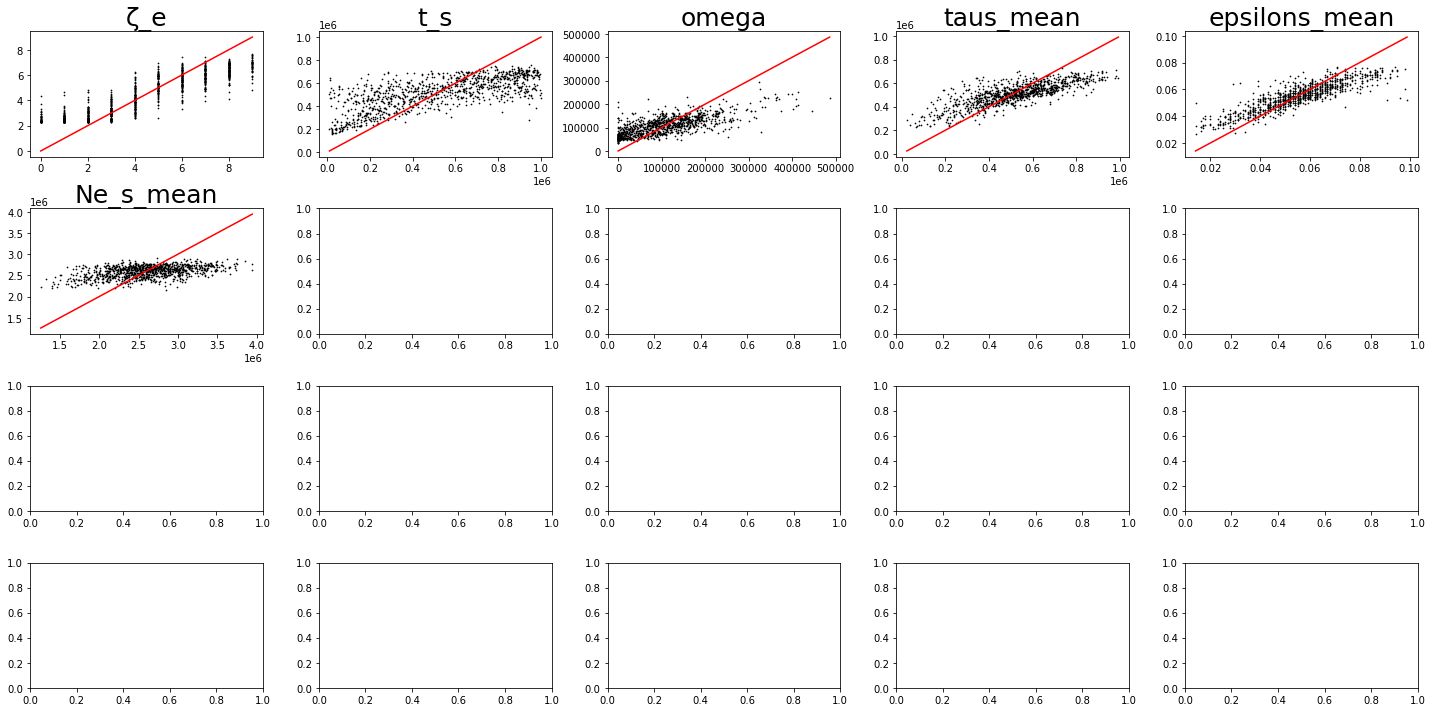

In [85]:

sorted_sim_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sorted_sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)

gb_params = {'n_estimators': 100,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

print(len(sorted_sim_df))
gb_sorted = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sorted_sim_df,\
                                algorithm="gb",\
                                verbose=True)
gb_sorted.set_params(gb_params)
gb_sorted.set_targets(["zeta_e", "t_s", "omega", "taus_mean", "epsilons_mean", "Ne_s_mean"])
gb_sorted.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
sorted_cv_preds1 = gb_sorted.cross_val_predict(verbose=True)
sorted_cv_scores1 = gb_sorted.cross_val_score(verbose=True)
ax = gb_sorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

Predict() started: 2022-04-07 09:04:02.562758
Predict() finished: 2022-04-07 09:36:14.599660
              precision    recall  f1-score   support

           0       0.15      0.00      0.01      6672
           1       0.40      0.69      0.50     13328
           2       0.31      0.27      0.29     13372
           3       0.37      0.33      0.35     13213
           4       0.43      0.44      0.44     13449
           5       0.36      0.40      0.38     13423
           6       0.32      0.21      0.25     13215
           7       0.34      0.27      0.30     13220
           8       0.37      0.54      0.44     13406
           9       0.44      0.38      0.41      6702

    accuracy                           0.37    120000
   macro avg       0.35      0.35      0.34    120000
weighted avg       0.36      0.37      0.35    120000



<AxesSubplot:xlabel='Predicted Ψ', ylabel='True Ψ'>

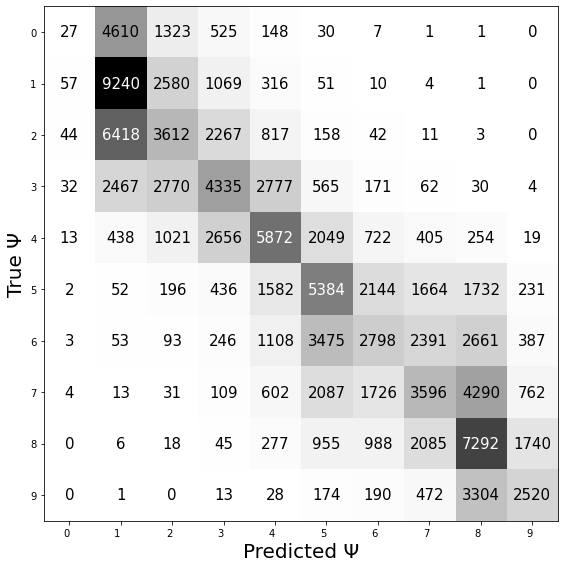

In [113]:

gb_sorted_cl = PTA.inference.Classifier(empirical_df=synthetic_community,
                                       sims=sorted_sim_df,
                                       algorithm="gb")
gb_sorted_cl.set_params(gb_params)
gb_sorted_cl.set_targets(["zeta_e"])
gb_sorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
cv_preds = gb_sorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
gb_sorted_cl.plot_confusion_matrix()

In [99]:
expanding_sorted_msfs.to_dataframe()

,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
0,0.713179,0.239843,0.174959,0.080827,0.688062,0.230946,0.173487,0.078543,0.678713,0.226319,0.152894,0.068655,0.652572,0.223852,0.147902,0.063709,0.650897,0.194954,0.119381,0.055943,0.56207,0.175918,0.107057,0.048967,0.554598,0.172104,0.106283,0.047091,0.513267,0.16817,0.103255,0.046833,0.508127,0.134599,0.095835,0.040184


Predict() started: 2022-04-04 15:46:29.131387
CPU times: user 91.1 ms, sys: 12 ms, total: 103 ms
Wall time: 133 ms


<BarContainer object of 10 artists>

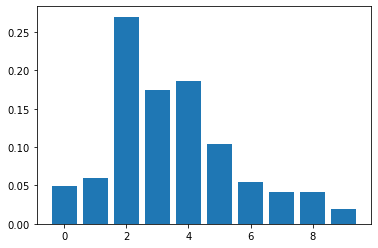

In [95]:
%%time
gb_sorted_cl.set_data(expanding_sorted_msfs.to_dataframe())
gb_class_est = gb_sorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
#axs = gb_sorted_cl.plot_feature_importance()
plt.bar(np.arange(10), gb_class_est[1].values[0])
#gb_class_est[1].values[0]


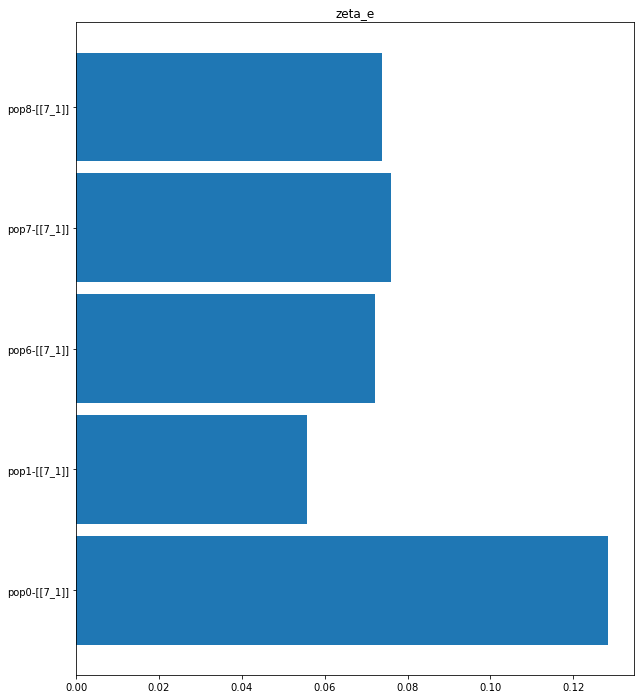

In [114]:
axs = gb_sorted_cl.plot_feature_importance()

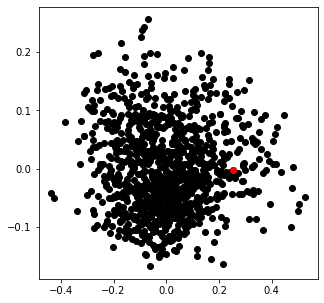

In [128]:
from sklearn.decomposition import PCA

dat = sim_sorted_df[sim_sorted_df["zeta_e"] == 3].iloc[:1000, 23:]
dat = pd.concat([expanding_sorted_msfs.to_dataframe(), dat])

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pcs[:, 0], pcs[:, 1], c='black')
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

In [107]:
sim_sorted_df[sim_sorted_df["zeta_e"].between(2, 4)]

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
1,0.353,3,1,11190,197978.744,294998.444,241667.999,0.269,-1.119,308370.0,376459.0,0.063,0.020,0.730,-0.760,0.052,0.016,2595779.111,1656445.859,0.225,-1.638,1703725.0,2739464.0,0.743,0.305,0.210,0.120,0.687,0.271,0.196,0.096,0.677,0.269,0.182,0.084,0.672,0.240,0.177,0.078,0.540,0.209,0.162,0.076,0.473,0.200,0.108,0.055,0.447,0.192,0.090,0.038,0.439,0.165,0.083,0.037,0.435,0.147,0.071,0.024
2,0.180,2,1,888849,41644.672,770756.000,179158.814,-1.376,0.674,849488.0,163185.0,0.032,0.011,1.047,1.338,0.032,0.008,1698671.778,1152968.380,0.753,-0.351,1396931.0,1503475.0,0.768,0.257,0.194,0.095,0.765,0.238,0.191,0.078,0.742,0.229,0.140,0.067,0.696,0.209,0.102,0.035,0.672,0.206,0.085,0.032,0.659,0.192,0.084,0.029,0.536,0.176,0.059,0.027,0.501,0.156,0.056,0.023,0.473,0.152,0.053,0.020
3,0.436,4,1,206960,202981.126,359375.000,270085.805,1.103,-0.266,206960.0,166178.0,0.039,0.032,0.569,-1.395,0.013,0.059,2796880.667,1223729.084,-0.489,-0.624,3139443.0,899828.0,0.850,0.219,0.196,0.063,0.837,0.162,0.060,0.039,0.833,0.155,0.055,0.030,0.831,0.104,0.049,0.029,0.826,0.101,0.048,0.028,0.826,0.098,0.045,0.020,0.791,0.091,0.045,0.019,0.762,0.091,0.044,0.017,0.522,0.082,0.027,0.006
12,0.490,4,1,507196,101863.723,370978.111,194394.474,-0.301,-1.389,507196.0,307677.0,0.056,0.026,-0.237,-1.866,0.072,0.052,3166314.222,1122396.152,-0.232,-1.451,3543352.0,1835162.0,0.766,0.179,0.110,0.066,0.728,0.179,0.105,0.050,0.715,0.175,0.102,0.049,0.703,0.174,0.101,0.048,0.694,0.173,0.100,0.040,0.676,0.168,0.092,0.038,0.671,0.168,0.087,0.036,0.666,0.136,0.081,0.035,0.666,0.127,0.063,0.034
17,0.178,2,1,235336,180825.886,435472.000,280614.700,0.474,-1.389,363323.0,488137.0,0.048,0.023,0.962,0.046,0.044,0.032,2466435.000,1384115.492,0.078,-0.998,2436379.0,1499801.0,0.799,0.217,0.157,0.064,0.736,0.214,0.124,0.060,0.716,0.213,0.105,0.038,0.703,0.207,0.096,0.036,0.681,0.201,0.095,0.035,0.671,0.154,0.090,0.035,0.662,0.151,0.074,0.032,0.628,0.132,0.070,0.030,0.572,0.132,0.057,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119991,0.400,4,1,66598,277059.981,330668.556,302679.738,0.807,-0.796,243364.0,402228.0,0.058,0.023,-0.457,-0.552,0.059,0.010,2636422.222,1430444.355,0.418,-1.423,2526069.0,2841307.0,0.668,0.240,0.209,0.093,0.654,0.221,0.173,0.083,0.649,0.217,0.164,0.080,0.574,0.207,0.164,0.078,0.562,0.199,0.156,0.072,0.552,0.199,0.127,0.067,0.548,0.197,0.127,0.043,0.524,0.181,0.121,0.039,0.512,0.172,0.093,0.036
119993,0.366,3,1,342666,232748.777,401105.111,305543.326,0.534,-0.883,342666.0,312712.0,0.056,0.035,-0.266,-1.866,0.083,0.072,3120353.778,1526470.409,-0.507,-1.376,3721855.0,2683077.0,0.779,0.221,0.183,0.101,0.702,0.205,0.152,0.068,0.683,0.193,0.137,0.065,0.658,0.184,0.137,0.064,0.626,0.182,0.122,0.055,0.624,0.176,0.114,0.051,0.621,0.162,0.109,0.048,0.610,0.159,0.087,0.025,0.495,0.141,0.046,0.013
119995,0.432,4,1,562038,44207.897,646123.222,169008.133,1.132,-0.300,562038.0,117489.0,0.085,0.019,-1.787,2.006,0.096,0.013,2444392.111,1424223.334,0.117,-1.392,2073660.0,2351060.0,0.675,0.244,0.163,0.074,0.652,0.219,0.138,0.060,0.652,0.197,0.126,0.060,0.649,0.191,0.119,0.

Predict() started: 2022-04-04 15:58:16.856176
Predict() finished: 2022-04-04 16:08:23.696289
Calculating prediction interval(s)
	t_s
	omega
	taus_mean
	epsilons_mean
	Ne_s_mean
CPU times: user 28min 16s, sys: 9.65 s, total: 28min 25s
Wall time: 30min 59s


,t_s,omega,taus_mean,epsilons_mean,Ne_s_mean
estimate,562627.726542,165495.646731,525430.614594,0.062771,2.523746e+06
lower 0.025,37034.020281,47559.002386,268570.022413,0.039855,1.764952e+06
upper 0.975,905857.853825,318056.695531,716792.387359,0.077787,3.353886e+06


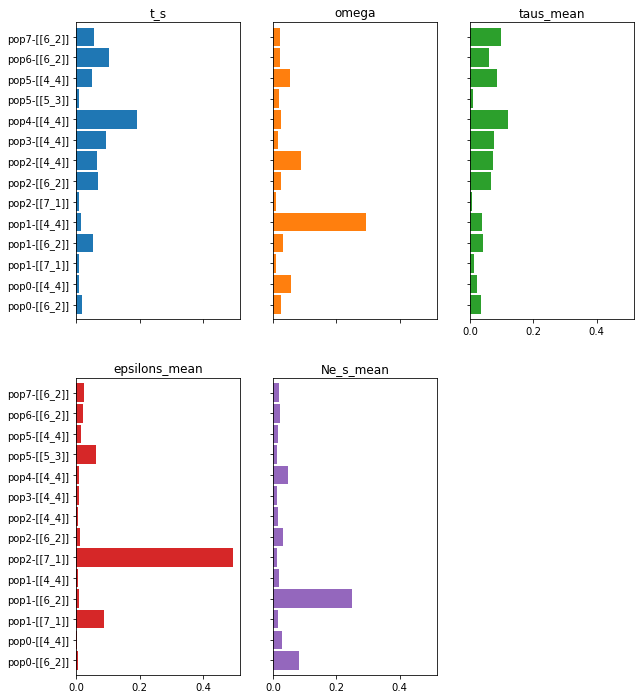

In [108]:
%%time
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)

gb_params = {'n_estimators': 100,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

## Select most probable zeta values for parameter inference
pruned_sorted_df = sim_sorted_df[sim_sorted_df["zeta_e"].between(2, 4)]

gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=pruned_sorted_df,
                                       algorithm="gb")
gb_sorted.set_targets(["t_s", "omega", "taus_mean", "epsilons_mean", "Ne_s_mean"])
gb_sorted.set_params(gb_params)
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()

gb_sorted_est

In [117]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

params = ["t_s", "taus_mean", "taus_std", "epsilons_mean", "epsilons_std", "Ne_s_mean", "Ne_s_std"]
test_X = expanding_sorted_msfs.to_dataframe()

pruned_sorted_df = sim_sorted_df[sim_sorted_df["zeta_e"].between(2, 4)]

X = pruned_sorted_df[test_X.columns]
y = pruned_sorted_df[params]

rf = RandomForestRegressor(**rgr_params)
rf.fit(X, y)

## Prediction from pruned simulations
pd.DataFrame(rf.predict(test_X), columns=params)

CPU times: user 30min 49s, sys: 2.42 s, total: 30min 52s
Wall time: 1min 3s


,t_s,taus_mean,taus_std,epsilons_mean,epsilons_std,Ne_s_mean,Ne_s_std
0,360086.884957,449413.212846,272549.800469,0.062552,0.022248,2.529055e+06,1.402809e+06


In [121]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rfq_params = {'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [122]:
%%time
## 50% Quantiles
from skgarden import RandomForestQuantileRegressor
rfqr = RandomForestQuantileRegressor(**rfq_params)
rfq_preds = pd.DataFrame([], index=["med", "up", "low"])
for idx, param in enumerate(["t_s", "taus_mean"]):
    print(param),
    rfqr.fit(X, y[param])
    upper = rfqr.predict(test_X, quantile=75)
    mid = rfqr.predict(test_X, quantile=50)
    lower = rfqr.predict(test_X, quantile=25)
    rfq_preds[param] = [mid, upper, lower]
rfq_preds

t_s
taus_mean
CPU times: user 1h 22min 22s, sys: 6.07 s, total: 1h 22min 28s
Wall time: 32min 27s


,t_s,taus_mean
med,[560286.8699840638],[516008.0162869667]
up,[781024.937194434],[590146.7669524224]
low,[433248.18216378597],[436727.0474965579]


## Predict zeta from empirical data
## Sorted

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7,pop8
[[7_1]],0.713179,0.688062,0.678713,0.652572,0.650897,0.562070,0.554598,0.513267,0.508127
[[6_2]],0.239843,0.230946,0.226319,0.223852,0.194954,0.175918,0.172104,0.168170,0.134599
[[5_3]],0.174959,0.173487,0.152894,0.147902,0.119381,0.107057,0.106283,0.103255,0.095835
[[4_4]],0.080827,0.078543,0.068655,0.063709,0.055943,0.048967,0.047091,0.046833,0.040184


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
0,0.713179,0.239843,0.174959,0.080827,0.688062,0.230946,0.173487,0.078543,0.678713,0.226319,0.152894,0.068655,0.652572,0.223852,0.147902,0.063709,0.650897,0.194954,0.119381,0.055943,0.56207,0.175918,0.107057,0.048967,0.554598,0.172104,0.106283,0.047091,0.513267,0.16817,0.103255,0.046833,0.508127,0.134599,0.095835,0.040184


Predict() started: 2022-02-04 18:36:56.331130
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
	taus_mean
	epsilons_mean
	Ne_s_mean
CPU times: user 31min 40s, sys: 1.44 s, total: 31min 41s
Wall time: 31min 41s


,zeta_e,t_s,omega,taus_mean,epsilons_mean,Ne_s_mean
estimate,3.391286,559020.868245,160483.857614,482800.741837,0.061605,2.460568e+06
lower 0.025,0.533881,34827.013470,11236.027138,189570.226827,0.033519,1.698747e+06
upper 0.975,9.000000,870162.747526,360571.853330,757996.934940,0.083405,3.368507e+06


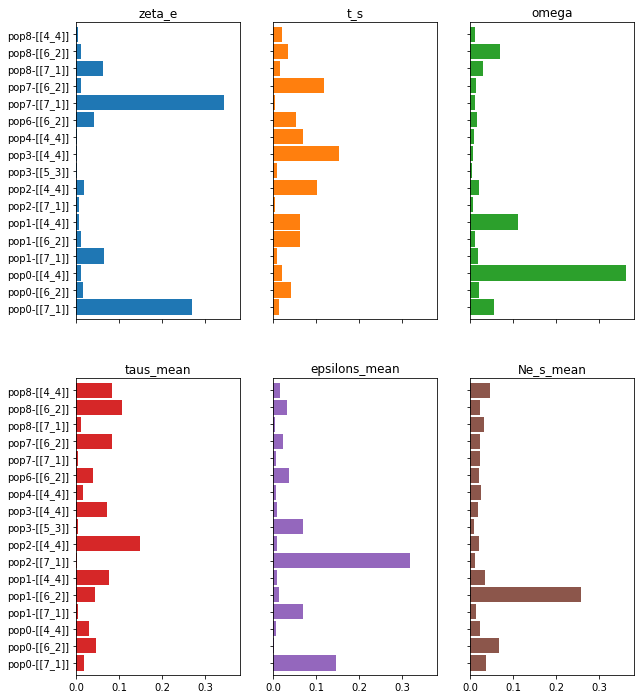

In [87]:
%%time
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)
display(expanding_sorted_msfs.df)
display(expanding_sorted_msfs.to_dataframe())

sim_sorted_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")

gb_params = {'n_estimators': 100,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}


#gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
#                                       sims=sim_sorted_df,
#                                       algorithm="gb")
gb_sorted.set_targets(["zeta_e", "t_s", "omega", "taus_mean", "epsilons_mean", "Ne_s_mean"])
gb_sorted.set_params(gb_params)
gb_sorted.set_data(expanding_sorted_msfs.to_dataframe())
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()

gb_sorted_est

,zeta_e,t_s,omega
estimate,2.909597,548341.973417,176674.043606
lower 0.025,0.788450,43717.715821,29598.878824
upper 0.975,9.000000,758784.867632,339319.744843


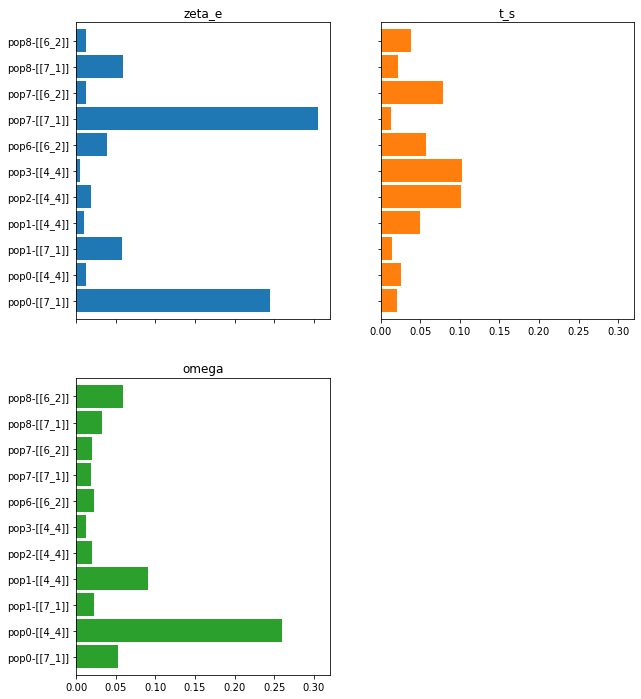

In [30]:
axs = gb_sorted.plot_feature_importance()
gb_sorted_est

Predict() started: 2021-11-15 07:51:45.225111
CPU times: user 70.6 ms, sys: 22 µs, total: 70.6 ms
Wall time: 69.3 ms


<BarContainer object of 10 artists>

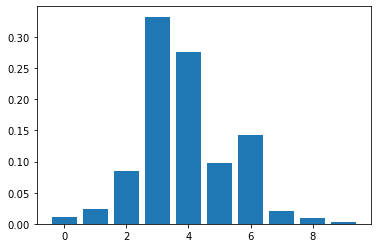

In [60]:
%%time
gb_sorted_cl.set_data(expanding_sorted_msfs.to_dataframe())
gb_class_est = gb_sorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
#axs = gb_sorted_cl.plot_feature_importance()
plt.bar(np.arange(10), gb_class_est[1].values[0])
#gb_class_est[1].values[0]


In [93]:
gb_sorted_cl

<class 'PTA.inference.Classifier'>: nsims - 40000
	Features - ['pop0-[[7_1]]', 'pop0-[[6_2]]', 'pop0-[[5_3]]', 'pop0-[[4_4]]', 'pop1-[[7_1]]', 'pop1-[[6_2]]', 'pop1-[[5_3]]', 'pop1-[[4_4]]', 'pop2-[[7_1]]', 'pop2-[[6_2]]', 'pop2-[[5_3]]', 'pop2-[[4_4]]', 'pop3-[[7_1]]', 'pop3-[[6_2]]', 'pop3-[[5_3]]', 'pop3-[[4_4]]', 'pop4-[[7_1]]', 'pop4-[[6_2]]', 'pop4-[[5_3]]', 'pop4-[[4_4]]', 'pop5-[[7_1]]', 'pop5-[[6_2]]', 'pop5-[[5_3]]', 'pop5-[[4_4]]', 'pop6-[[7_1]]', 'pop6-[[6_2]]', 'pop6-[[5_3]]', 'pop6-[[4_4]]', 'pop7-[[7_1]]', 'pop7-[[6_2]]', 'pop7-[[5_3]]', 'pop7-[[4_4]]', 'pop8-[[7_1]]', 'pop8-[[6_2]]', 'pop8-[[5_3]]', 'pop8-[[4_4]]']
	Targets - ['zeta_e']

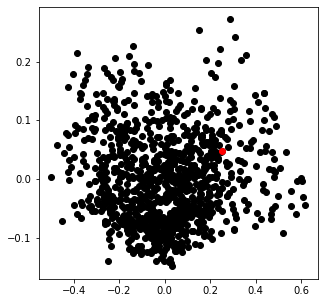

In [90]:
from sklearn.decomposition import PCA

dat = sim_sorted_df[sim_sorted_df["zeta_e"] == 4].iloc[:1000, 23:]
dat = pd.concat([expanding_sorted_msfs.to_dataframe(), dat])

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pcs[:, 0], pcs[:, 1], c='black')
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

## Unsorted

44040
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2022-02-02 15:55:45.254517
Predict() finished: 2022-02-02 17:05:12.021635
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
                  MAE        RMSE    vscore        R2
zeta_e       0.847319    0.005199  0.827689  0.827686
t_s     139506.766457  859.134363  0.599677  0.599626
omega    47520.971544  310.027960  0.463390  0.463374


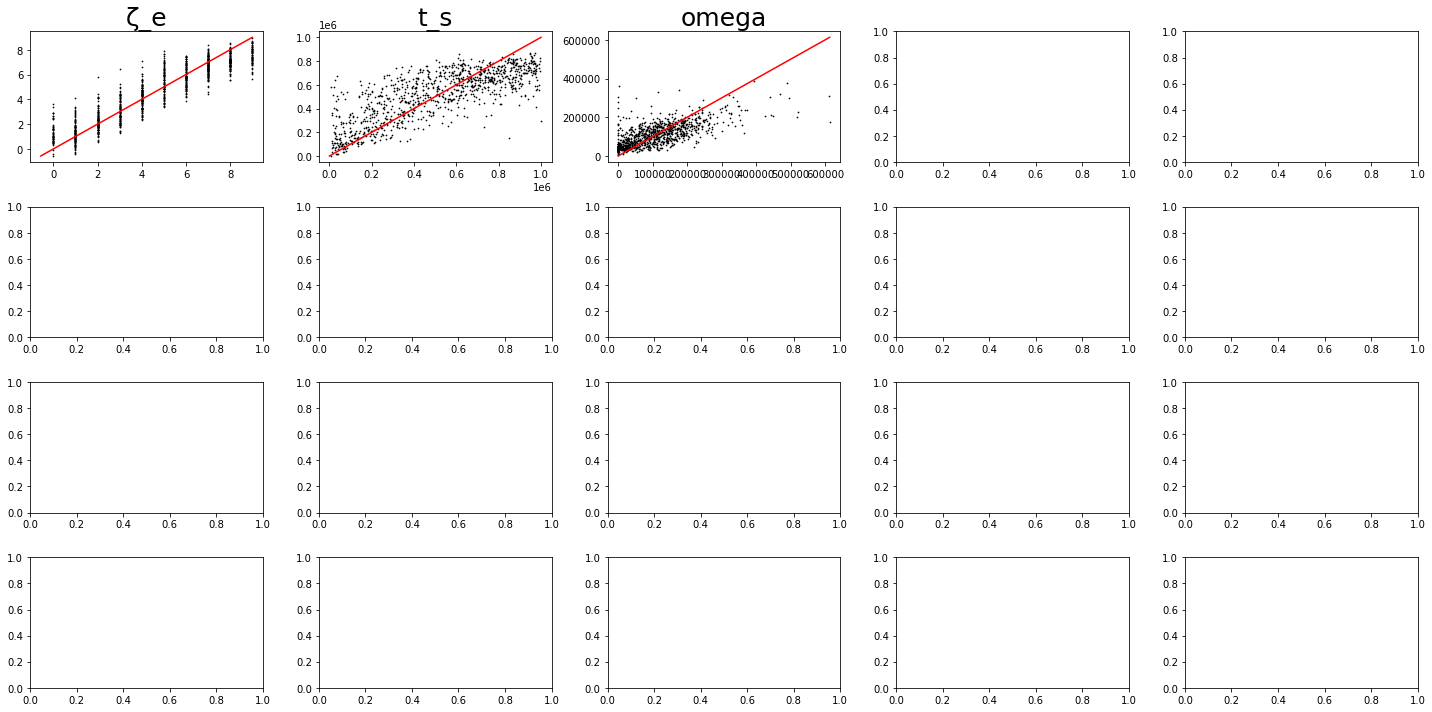

In [71]:

unsorted_sim_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-unsorted-props-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(unsorted_sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)

gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

print(len(unsorted_sim_df))
gb_unsorted = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=unsorted_sim_df,\
                                algorithm="gb",\
                                verbose=True)
gb_unsorted.set_params(gb_params)
gb_unsorted.set_targets(["zeta_e", "t_s", "omega"])
gb_unsorted.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
unsorted_cv_preds1 = gb_unsorted.cross_val_predict(verbose=True)
unsorted_cv_scores1 = gb_unsorted.cross_val_score(verbose=True)
ax = gb_unsorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

Predict() started: 2022-02-02 20:54:58.592871
Predict() finished: 2022-02-03 00:19:06.730876
              precision    recall  f1-score   support

           0       0.30      0.05      0.09      2476
           1       0.61      0.70      0.65      4897
           2       0.63      0.65      0.64      4976
           3       0.64      0.57      0.60      4844
           4       0.64      0.64      0.64      4968
           5       0.58      0.49      0.53      4900
           6       0.50      0.50      0.50      4789
           7       0.47      0.53      0.50      4923
           8       0.47      0.72      0.57      4878
           9       0.50      0.29      0.37      2389

    accuracy                           0.55     44040
   macro avg       0.53      0.52      0.51     44040
weighted avg       0.55      0.55      0.54     44040



<AxesSubplot:xlabel='Predicted Ψ', ylabel='True Ψ'>

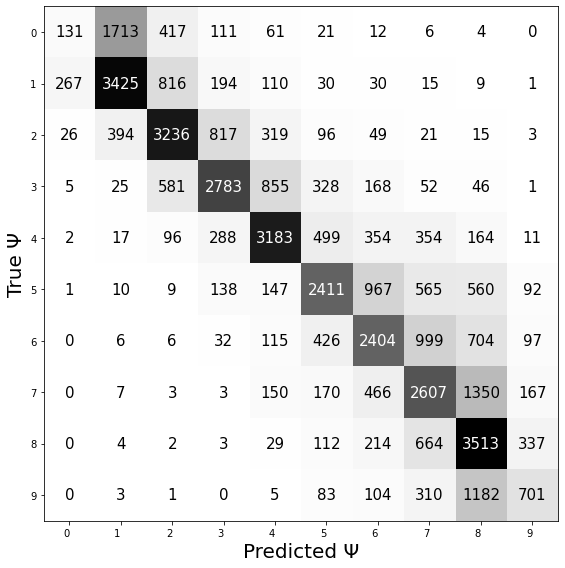

In [74]:

gb_unsorted_cl = PTA.inference.Classifier(empirical_df=synthetic_community,
                                       sims=unsorted_sim_df,
                                       algorithm="gb")
gb_unsorted_cl.set_params(gb_params)
gb_unsorted_cl.set_targets(["zeta_e"])
gb_unsorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
cv_preds = gb_unsorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
gb_unsorted_cl.plot_confusion_matrix()

In [ ]:
%%time
expanding_unsorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=False, proportions=True)
display(expanding_unsorted_msfs.df)
display(expanding_unsorted_msfs.to_dataframe())

gb_params = {'n_estimators': 100,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}


gb_unsorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=unsorted_sim_df,
                                       algorithm="gb")
gb_unsorted.set_targets(["zeta_e", "t_s", "omega", "taus_mean", "epsilons_mean", "Ne_s_mean"])
gb_unsorted.set_params(gb_params)
gb_unsorted_est = gb_unsorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_unsorted.plot_feature_importance()

gb_unsorted_est

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7,pop8
[[7_1]],0.508127,0.713179,0.688062,0.650897,0.678713,0.652572,0.562070,0.554598,0.513267
[[6_2]],0.239843,0.134599,0.175918,0.194954,0.168170,0.172104,0.226319,0.223852,0.230946
[[5_3]],0.173487,0.103255,0.095835,0.107057,0.106283,0.119381,0.147902,0.152894,0.174959
[[4_4]],0.078543,0.048967,0.040184,0.047091,0.046833,0.055943,0.063709,0.068655,0.080827


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
0,0.508127,0.239843,0.173487,0.078543,0.713179,0.134599,0.103255,0.048967,0.688062,0.175918,0.095835,0.040184,0.650897,0.194954,0.107057,0.047091,0.678713,0.16817,0.106283,0.046833,0.652572,0.172104,0.119381,0.055943,0.56207,0.226319,0.147902,0.063709,0.554598,0.223852,0.152894,0.068655,0.513267,0.230946,0.174959,0.080827


Predict() started: 2022-02-04 22:35:46.730246
Predict() finished: 2022-02-04 22:43:09.876342
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
	taus_mean
	epsilons_mean
	Ne_s_mean


In [83]:
gb_unsorted_est

,zeta_e,t_s,omega
estimate,3.890184,525752.515217,172100.502733
lower 0.025,1.095449,30017.452942,10951.579145
upper 0.975,8.281902,922575.205188,314606.553667


Predict() started: 2022-02-03 14:59:29.014555
Predict() finished: 2022-02-03 17:09:04.337554
CPU times: user 2h 9min 29s, sys: 6.48 s, total: 2h 9min 35s
Wall time: 2h 9min 35s


<BarContainer object of 10 artists>

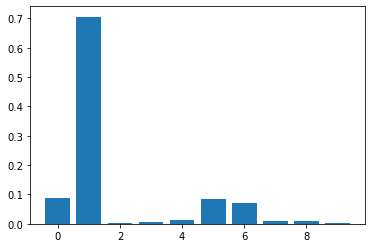

In [81]:
%%time
gb_unsorted_cl = PTA.inference.Classifier(empirical_df=synthetic_community,
                                       sims=unsorted_sim_df,
                                       algorithm="gb")
gb_unsorted_cl.set_params(gb_params)
gb_unsorted_cl.set_targets(["zeta_e"])
gb_unsorted_cl.set_data(expanding_unsorted_msfs.to_dataframe())
gb_unclass_est = gb_unsorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
#axs = gb_sorted_cl.plot_feature_importance()
plt.bar(np.arange(10), gb_unclass_est[1].values[0])
#gb_class_est[1].values[0]


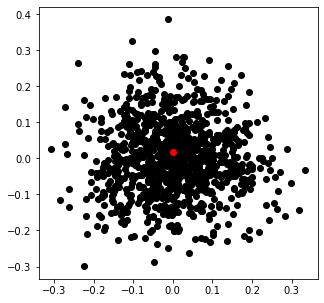

In [82]:
from sklearn.decomposition import PCA

dat = unsorted_sim_df[unsorted_sim_df["zeta_e"] == 1].iloc[:1000, 23:]
dat = pd.concat([expanding_unsorted_msfs.to_dataframe(), dat])

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pcs[:, 0], pcs[:, 1], c='black')
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

## Stop

# RF Quantile

## Unsorted summary statistics

In [15]:
expanding_unsorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=False, proportions=True)
display(expanding_unsorted_msfs.df)
display(expanding_unsorted_msfs.to_dataframe())

sim_unsorted_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-unsorted-props-SIMOUT.csv", sep=" ")
print(len(sim_unsorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7,pop8
[[7_1]],0.508127,0.713179,0.688062,0.650897,0.678713,0.652572,0.562070,0.554598,0.513267
[[6_2]],0.239843,0.134599,0.175918,0.194954,0.168170,0.172104,0.226319,0.223852,0.230946
[[5_3]],0.173487,0.103255,0.095835,0.107057,0.106283,0.119381,0.147902,0.152894,0.174959
[[4_4]],0.078543,0.048967,0.040184,0.047091,0.046833,0.055943,0.063709,0.068655,0.080827


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
0,0.508127,0.239843,0.173487,0.078543,0.713179,0.134599,0.103255,0.048967,0.688062,0.175918,0.095835,0.040184,0.650897,0.194954,0.107057,0.047091,0.678713,0.16817,0.106283,0.046833,0.652572,0.172104,0.119381,0.055943,0.56207,0.226319,0.147902,0.063709,0.554598,0.223852,0.152894,0.068655,0.513267,0.230946,0.174959,0.080827


44040


In [9]:
## rfq doesn't like some of the stock rf params above
rgrq_params = {'max_depth': 70,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 1400,
#    'n_jobs': -1,
}

print(datetime.datetime.now())
rgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df)
rgr_unsorted.set_params(rgrq_params)
rgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
est_unsorted = rgr_unsorted.predict(select_features=False,
                                    param_search=False,
                                    quick=True,
                                    verbose=False)
print(datetime.datetime.now())
est_unsorted

2021-11-13 14:12:27.483175
2021-11-13 14:13:36.987821


,zeta_e,t_s,omega
estimate,4.190779,446320.507291,0.000098
lower 0.025,0.000000,14911.526921,0.000000
upper 0.975,9.000000,989938.792604,0.000000


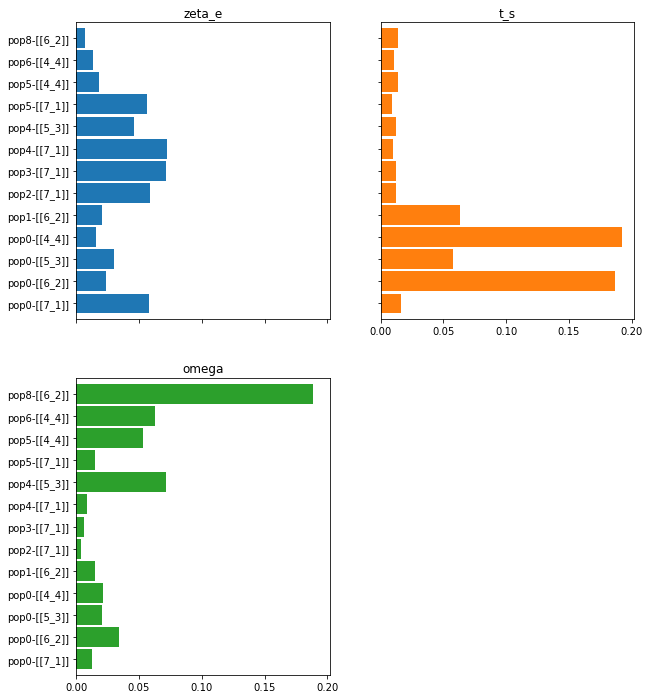

In [12]:
axs = rgr_unsorted.plot_feature_importance()

## Sorted summary statistics

In [16]:
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)
display(expanding_sorted_msfs.df)
display(expanding_sorted_msfs.to_dataframe())

sim_sorted_df = pd.read_csv("./analysis/9pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
print(len(sim_sorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7,pop8
[[7_1]],0.713179,0.688062,0.678713,0.652572,0.650897,0.562070,0.554598,0.513267,0.508127
[[6_2]],0.239843,0.230946,0.226319,0.223852,0.194954,0.175918,0.172104,0.168170,0.134599
[[5_3]],0.174959,0.173487,0.152894,0.147902,0.119381,0.107057,0.106283,0.103255,0.095835
[[4_4]],0.080827,0.078543,0.068655,0.063709,0.055943,0.048967,0.047091,0.046833,0.040184


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]],pop8-[[7_1]],pop8-[[6_2]],pop8-[[5_3]],pop8-[[4_4]]
0,0.713179,0.239843,0.174959,0.080827,0.688062,0.230946,0.173487,0.078543,0.678713,0.226319,0.152894,0.068655,0.652572,0.223852,0.147902,0.063709,0.650897,0.194954,0.119381,0.055943,0.56207,0.175918,0.107057,0.048967,0.554598,0.172104,0.106283,0.047091,0.513267,0.16817,0.103255,0.046833,0.508127,0.134599,0.095835,0.040184


44040


In [11]:
 
rgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df)
rgr.set_params(rgrq_params)
est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=False)
est

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


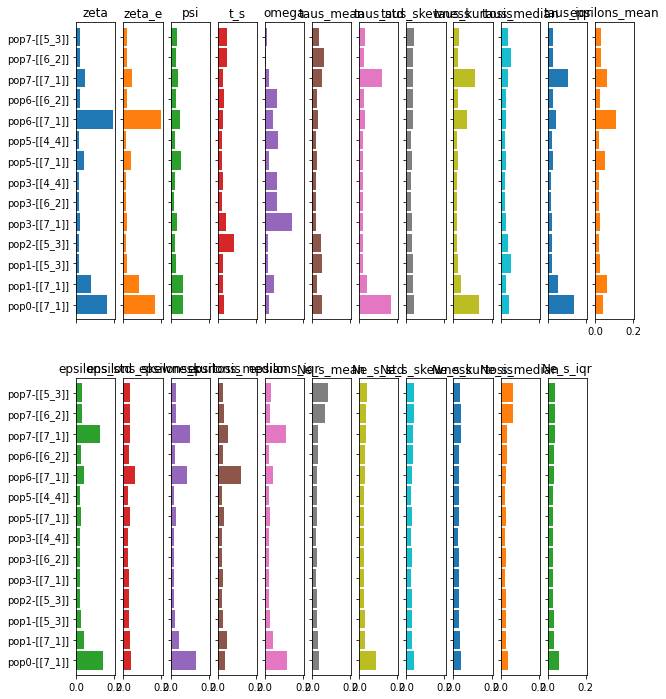

In [14]:
display(est)
axs = rgr.plot_feature_importance()

# RandomForest

In [110]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Unsorted

    w/ quick=True
    2021-09-16 10:23:53.176613
    2021-09-16 10:26:10.980052
    
                  zeta_e	t_s    omega
    estimate	5.546885	491896.23111	0.000291

2021-09-16 10:32:02.732011
2021-09-16 10:34:16.433432


,zeta_e,t_s,omega
estimate,5.570182,511872.977605,0.000146


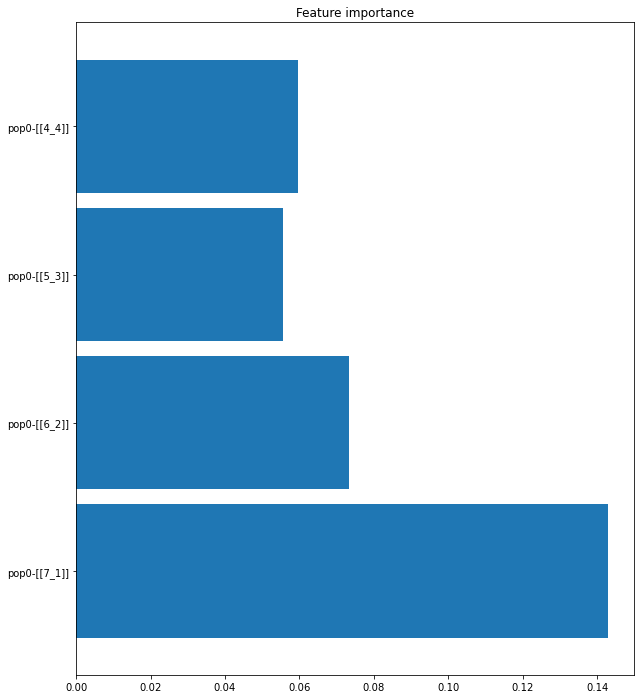

In [30]:
print(datetime.datetime.now())
rfrgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="rf")
rfrgr_unsorted.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_unsorted = rfrgr_unsorted.predict(select_features=False,
                                        param_search=False,
                                        quick=False,
                                        verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_unsorted

## Sorted

In [112]:
%%time
rf_sorted_cl = PTA.inference.Classifier(empirical_df=synthetic_community,
                                       sims=sorted_sim_df,
                                       algorithm="rf")
rf_sorted_cl.set_params(rgr_params)
rf_sorted_cl.set_targets(["zeta_e"])
rf_sorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
rfcv_preds = rf_sorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
rf_sorted_cl.plot_confusion_matrix()

Predict() started: 2022-04-07 08:52:29.580685


/home/isaac/PTA/PTA/inference.py:411: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_model.fit(self.X, self.y)


KeyError: 'mse'

2021-09-16 10:26:48.683367
2021-09-16 10:27:35.700765


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.919058,7.498678,1.0,562300.646591,0.000237,529919.236914,63507.039815,0.013191,-2.573644,527670.62406,68763.692536,9.001999,1.199052,0.018966,-2.576952,8.882011,1.293557,444506.0802,288094.450701,0.074864,-0.998961,436420.442863,424836.252765


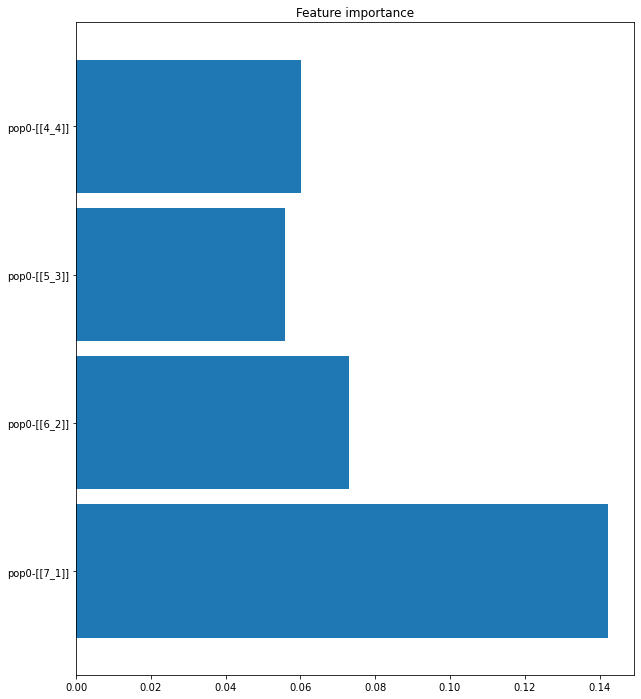

In [29]:
print(datetime.datetime.now())
rfrgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df,
                              algorithm="rf")
rfrgr.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_sorted = rfrgr.predict(select_features=False,
                             param_search=False,
                             quick=True,
                             verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_sorted

# GB

```
Best params for zeta_e: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.012589254117941661}

Best params for t_s: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'learning_rate': 0.0025118864315095794}
```

In [17]:
gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

## Unsorted

2021-11-14 05:00:54.039918
Predict() started: 2021-11-14 05:00:54.084404
Predict() finished: 2021-11-14 05:37:04.381260
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2021-11-14 06:48:41.084301


,zeta_e,t_s,omega
estimate,4.056610,494822.632328,198059.895033
lower 0.025,0.801453,20708.527502,27713.050807
upper 0.975,7.517406,949158.416840,330632.030004


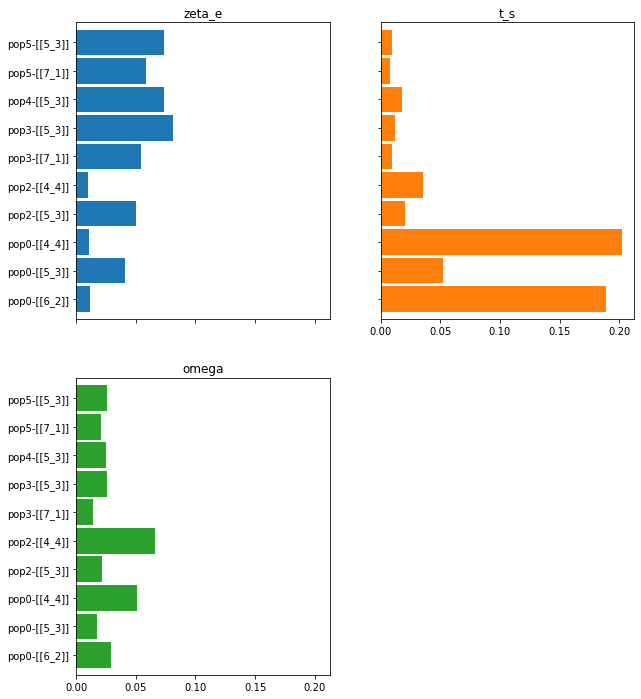

In [18]:
print(datetime.datetime.now())
gb_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="gb")
gb_unsorted.set_targets(["zeta_e", "t_s", "omega"])
gb_unsorted.set_params(gb_params)
gb_unsorted_est = gb_unsorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_unsorted.plot_feature_importance()
print(datetime.datetime.now())
gb_unsorted_est

## Sorted

2021-11-14 06:48:41.409306
Predict() started: 2021-11-14 06:48:41.458013
Predict() finished: 2021-11-14 07:20:13.544406
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2021-11-14 08:24:37.595478


,zeta_e,t_s,omega
estimate,3.517073,367669.729448,195760.855893
lower 0.025,1.609381,44231.352699,26869.455692
upper 0.975,6.379875,872191.092135,323497.064399


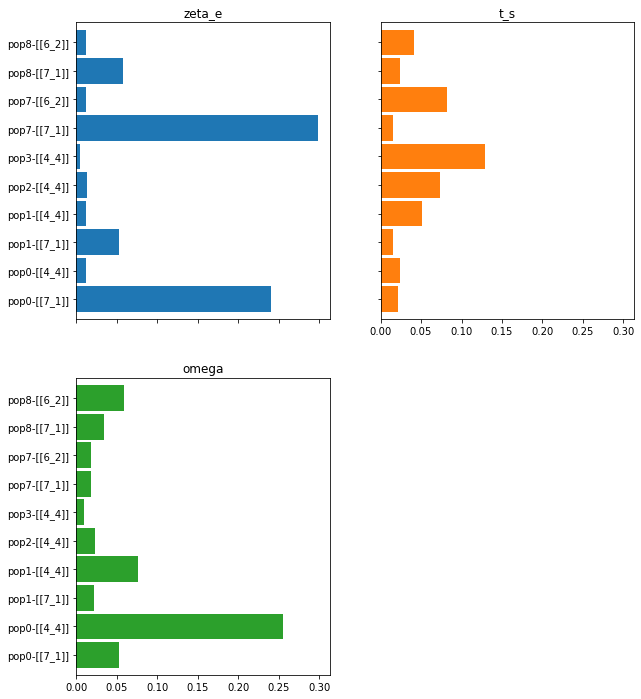

In [19]:
print(datetime.datetime.now())
gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_sorted_df,
                                       algorithm="gb")
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.set_params(gb_params)
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()
print(datetime.datetime.now())
gb_sorted_est

In [125]:
expanding_unsorted_msfs.df.to_csv("/tmp/K4_proj8_unsorted.msfs")